La programación lineal es una técnica matemática utilizada para encontrar la mejor solución posible, dadas ciertas restricciones, en un conjunto de ecuaciones lineales. Se utiliza principalmente en la optimización de problemas donde se busca maximizar o minimizar una función lineal, conocida como **función objetivo**, sujeta a un conjunto de restricciones lineales.

En esencia, la programación lineal trata de maximizar o minimizar una función lineal de variables, llamadas **variables de decisión**, sujetas a restricciones lineales. Las **restricciones** representan las limitaciones o condiciones bajo las cuales se debe operar para encontrar la solución óptima.

**CASO:**

Supongamos que eres el gerente de una fábrica que produce dos tipos de productos: A y B. Tu objetivo es maximizar los beneficios diarios de la fábrica al decidir cuántos productos de cada tipo producir. Sin embargo, hay limitaciones en la cantidad de materia prima disponible y en la capacidad de producción.

In [1]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 48.3 MB/s eta 0:00:00


In [2]:
# Importar librerias necesarias

import pulp
import numpy as np
import matplotlib.pyplot as plt

# **1. DEFINIR EL PROBLEMA**

Lo primero es especificar si el problema a resolver es de maximización o minimización.

El **problema** se refiere a una situación matemática formulada para encontrar la mejor solución posible (ya sea maximizar o minimizar una cantidad específica) sujeta a un conjunto de restricciones. Estos problemas se modelan usando funciones lineales, y la solución óptima se encuentra en el espacio factible definido por las restricciones.

In [7]:
# Definir el problema
prob = pulp.LpProblem("Maximizar Z", pulp.LpMaximize)

/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1298: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


✅ En este caso, queremos maximizar los beneficios, donde: "Maximizar_Z" es el nombre que definimos para el problema y `pulp.LpMaximize` indica que queremos maximizar la función objetivo.

⚠️ NOTA: Si fuera un problema de minimización, usaríamos `pulp.LpMinimize`.

# **2. VARIABLES DE DECISIÓN**

Las **variables de decisión** en un problema de programación lineal son las incógnitas que representan las cantidades o decisiones que se deben tomar para optimizar la función objetivo. Estas variables son las que el tomador de decisiones tiene el control para modificar y que afectan directamente el resultado del problema.

En un problema de programación lineal típico, las variables de decisión suelen representar cantidades de productos a producir, niveles de actividad, asignaciones de recursos, o cualquier otra cantidad que se esté tratando de determinar.

En el contexto de este problema, las variables de decisión son 𝑋 e 𝑌, que representan las cantidades de dos productos o actividades que deben determinarse para optimizar el beneficio total. Por lo tanto, estas variables representan las decisiones sobre cuánto producir de cada producto o actividad.

✅ Variables del Problema:

*   𝑋: Cantidad de productos de tipo A a producir por día.
*   𝑌: Cantidad de productos de tipo B a producir por día.

In [8]:
# Definir variables de decisión
X = pulp.LpVariable('X', lowBound=0) # X >= 0
Y = pulp.LpVariable('Y', lowBound=0) # Y >= 0

Las variables de decisión son las incógnitas que queremos determinar.
𝑋 e 𝑌 son las variables de decisión, y `lowBound=0` especifica que estas variables no pueden ser negativas. Es decir, tienen una restricción de "no negatividad", donde:

`𝑋,𝑌 ≥ 0`

# **3. FUNCIÓN OBJETIVO**

La **función objetivo** en un problema de programación lineal es una expresión matemática que define el objetivo que se busca optimizar. En otras palabras, es la función que queremos maximizar o minimizar mediante la selección adecuada de las variables de decisión, sujetas a las restricciones del problema.

*   🔹 En un problema de **maximización**, la función objetivo representa la cantidad que queremos maximizar, como beneficios, ingresos, producción, etc.
*   🔹 En un problema de **minimización**, la función objetivo representa la cantidad que queremos minimizar, como costos, pérdidas, tiempo, etc.

Por ejemplo, en un problema de maximización de beneficios en la producción de dos productos
𝑋 e 𝑌, la función objetivo podría ser la suma de los beneficios de cada producto multiplicado por su respectiva cantidad producida:

`𝑍 = a𝑋 + b𝑌`

Donde
𝑍 es la función objetivo que representa el beneficio total, 𝑋 e 𝑌 son las cantidades de los productos producidos, a y b son los beneficios por unidad de los productos 𝑋 e 𝑌 respectivamente.

La tarea en un problema de programación lineal es encontrar los valores de las variables de decisión que optimicen (maximicen o minimicen) el valor de la función objetivo, cumpliendo al mismo tiempo con las restricciones del problema.

In [9]:
# Definir la función objetivo
prob += 300*X + 500*Y, "Z"

✅ En este problema se busca maximizar los beneficios diarios, que están determinados por los precios de venta de cada producto y los costos de producción. El precio de venta del producto de tipo A es de 300 y el precio de venta del producto de tipo B es de 500. Por lo tanto, la función objetivo sería:

prob += 300*X + 500*Y, "Z"


# **4. RESTRICCIONES**

Las restricciones limitan las posibles soluciones del problema. En un problema de programación lineal, son condiciones que limitan las posibles soluciones permitidas. Estas restricciones pueden surgir de diversas fuentes, como la disponibilidad de recursos, capacidades de producción, demanda del mercado, entre otros aspectos relevantes para el problema específico que se está abordando.

Las restricciones típicas en un problema de programación lineal suelen ser:


⛔ **Restricciones de igualdad:** Estas restricciones establecen que una combinación lineal de las variables de decisión debe ser igual a un valor específico. Por ejemplo, en un problema de asignación de recursos, una restricción de igualdad podría representar la cantidad total de recursos disponibles.

⛔ **Restricciones de desigualdad:** Estas restricciones establecen que una combinación lineal de las variables de decisión debe ser menor o igual a un valor específico. Por ejemplo, en un problema de producción, una restricción de desigualdad podría representar la capacidad máxima de producción de una fábrica.

⛔ **Restricciones de no negatividad:** Indican que las variables de decisión deben ser mayores o iguales a cero.

In [12]:
# Definir restricciones
prob += X + 4*Y <= 18, "Restricción 1"
prob += 2*X + 2*Y <= 16, "Restricción 2"

✅ Restricciones:

Recursos de Materia Prima: La cantidad total de materia prima disponible para la producción de ambos productos es limitada. Cada unidad de producto A utiliza una unidad de materia prima y cada unidad de producto B utiliza dos unidades de materia prima. Solo se tienen 1000 unidades de materia prima disponible por día. Por lo que la restricción es:

X + 4*Y <= 18

Capacidad de Producción: La fábrica tiene una capacidad máxima de producción por día. La capacidad de producción de productos de tipo A es de 400 unidades y la capacidad de producción de productos de tipo B es de 300 unidades. Por lo que la segunda restricción es:

2*X + 2*Y <= 16

# **5. OPTIMIZACIÓN**

La optimización es el proceso de encontrar la mejor solución posible para un problema, dado un conjunto de restricciones y objetivos específicos. La solución óptima en un problema de programación lineal se define como la combinación de valores para las variables de decisión que maximiza o minimiza el valor de la función objetivo, cumpliendo al mismo tiempo con todas las restricciones del problema. Se resuelve el problema encontrando valores óptimos de la función objetivo y las variables de decisión.

✅ Utilizando este modelo matemático, puedes determinar la cantidad óptima de productos de cada tipo a producir por día para maximizar los beneficios de la fábrica, teniendo en cuenta las limitaciones de materia prima y capacidad de producción.

In [13]:
# Resolver el problema
prob.solve()

# Imprimir el estado del problema (si se encontró una solución óptima)
print("Estado:", pulp.LpStatus[prob.status])

# Obtener el óptimo determinístico:

# 1. valores óptimos de las variables de decisión
opt_X = pulp.value(X)
opt_Y = pulp.value(Y)

# 2. valor óptimo de la función objetivo
opt_Z = pulp.value(prob.objective)

print(f"Óptimo Determinístico: X = {opt_X}, Y = {opt_Y}, Z = {opt_Z}")

Estado: Optimal
Óptimo Determinístico: X = 4.6666667, Y = 3.3333333, Z = 3066.6666600000003


Después de definir el problema, las variables, la función objetivo y las restricciones, resolvemos el problema con la función `solve()`.

`pulp.LpStatus[prob.status]` devuelve el estado del problema (óptimo, no factible, etc.)

`pulp.value()` se usa para obtener los valores de la función objetivo y las variables de decisión.

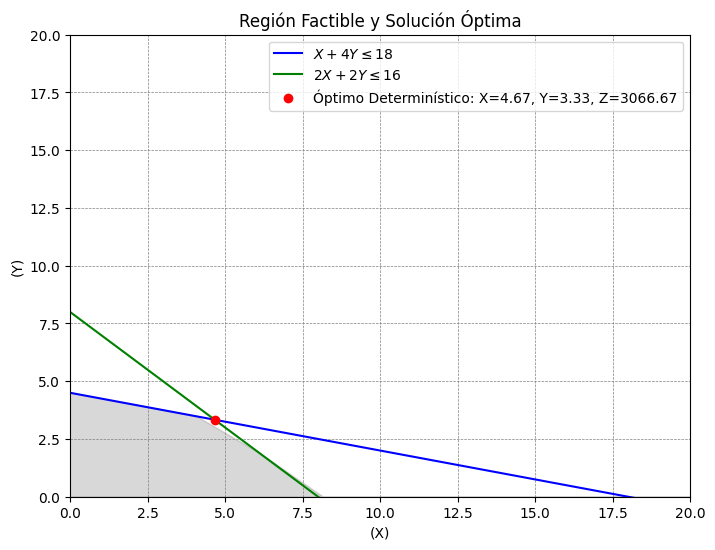

In [31]:
# Definir las restricciones para la gráfica:
x_vals = np.linspace(0, 100)  # Ajustar el rango de valores para X
y1_vals = (18 - x_vals) / 4  # De la restricción X + 4Y <= 18
y2_vals = (16 - x_vals * 2) / 2  # De la restricción 2X + 2Y <= 16

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las restricciones
plt.plot(x_vals, y1_vals, label=r'$X + 4Y \leq 18$', color='blue')  # Restricción de materia prima
plt.plot(x_vals, y2_vals, label=r'$2X + 2Y \leq 16$', color='green')  # Restricción de capacidad de producción

# Región factible sombreada
plt.fill_between(x_vals, np.maximum(0, np.minimum(y1_vals, y2_vals)), color='grey', alpha=0.3)

# Marcar el punto óptimo
plt.plot(opt_X, opt_Y, 'ro', label=f'Óptimo Determinístico: X={opt_X:.2f}, Y={opt_Y:.2f}, Z={opt_Z:.2f}')

# Configuraciones del gráfico
plt.xlim(0,20)  # Limitar el rango de valores de X para mostrar las restricciones
plt.ylim(0,20)  # Limitar el rango de valores de Y para mostrar las restricciones
plt.xlabel('(X)')
plt.ylabel('(Y)')
plt.title('Región Factible y Solución Óptima')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


# **6. ANÁLISIS DE SENSIBILIDAD**

El Análisis de Sensibilidad es una técnica utilizada en la optimización y la toma de decisiones para evaluar cómo cambia la solución óptima ante variaciones en los parámetros del problema, como los coeficientes de la función objetivo o las constantes de las restricciones.

El objetivo del Análisis de Sensibilidad es entender cómo afectan estos cambios en los parámetros a la solución óptima y a las decisiones que se toman a partir de ella. Esto puede ser especialmente útil para comprender la estabilidad de la solución óptima frente a cambios en el entorno o las condiciones del problema.

Para realizar un análisis de sensibilidad considerando un porcentaje de variación en los parámetros, vamos a evaluar cómo cambian la solución óptima y el valor de la función objetivo 𝑍 cuando los coeficientes de la función objetivo y las restricciones se alteran. Esto se puede hacer modificando los coeficientes y resolviendo el problema para cada variación. Vamos a considerar variaciones en los coeficientes de la función objetivo y en los límites de las restricciones.

Cuando hablamos del "peor valor" en el contexto del análisis de sensibilidad para encontrar una solución robusta, nos referimos al valor más desfavorable o más bajo obtenido entre todas las soluciones posibles considerando las variaciones en los parámetros del problema.

La idea es que, al considerar estas variaciones, queremos asegurarnos de que la solución que obtengamos sea válida incluso en los peores escenarios dentro del rango de variación. Por lo tanto, entre todas las soluciones obtenidas, identificamos aquella que tenga el valor más bajo de la función objetivo
𝑍. Esta solución con el valor más bajo de 𝑍 se considera la **solución robusta**, ya que es la que mejor se comporta en los peores casos dentro del rango de variación.


In [26]:
def solve_problem(coeff_X, coeff_Y, rhs1, rhs2):
    # Crear un problema de maximización
    prob = pulp.LpProblem("Maximizar_Z", pulp.LpMaximize)

    # Definir las variables de decisión (X y Y) que deben ser no negativas
    X = pulp.LpVariable('X', lowBound=0)
    Y = pulp.LpVariable('Y', lowBound=0)

    # Definir la función objetivo a maximizar
    prob += coeff_X * X + coeff_Y * Y, "Z"

    # Agregar las restricciones del problema
    prob += X + 4*Y <= rhs1, "Restricción 1"  # Restricción de materia prima
    prob += 2*X + 2*Y <= rhs2, "Restricción 2"  # Restricción de capacidad de producción

    # Resolver el problema
    prob.solve()

    # Obtener los resultados
    optimal_X = pulp.value(X)
    optimal_Y = pulp.value(Y)
    optimal_Z = pulp.value(prob.objective)
    return optimal_X, optimal_Y, optimal_Z

# Variaciones del 10%
variations = [0.9, 1.1]

# Inicializar variables para la solución robusta
robust_X = []
robust_Y = []
robust_Z = []

# Analizar todas las combinaciones de variaciones
for v_coeff_X in variations:
    for v_coeff_Y in variations:
        for v_rhs1 in variations:
            for v_rhs2 in variations:
                X, Y, Z = solve_problem(300 * v_coeff_X, 500 * v_coeff_Y, 18 * v_rhs1, 16 * v_rhs2)
                robust_X.append(X)
                robust_Y.append(Y)
                robust_Z.append(Z)

# La solución robusta es la peor de todas las soluciones obtenidas
worst_Z = min(robust_Z)
worst_X = robust_X[robust_Z.index(worst_Z)]
worst_Y = robust_Y[robust_Z.index(worst_Z)]

print(f"Solución Robusta: X = {worst_X}, Y = {worst_Y}, Z = {worst_Z}")


Solución Robusta: X = 4.2, Y = 3.0, Z = 2484.0


In [27]:
# Calcular el porcentaje de variación de la solución robusta respecto al óptimo determinístico
percentage_variation = ((opt_Z - worst_Z) / opt_Z) * 100
print(f"Porcentaje de Variación de la Solución Robusta respecto al Óptimo Determinístico: {percentage_variation:.2f}%")

Porcentaje de Variación de la Solución Robusta respecto al Óptimo Determinístico: 19.00%


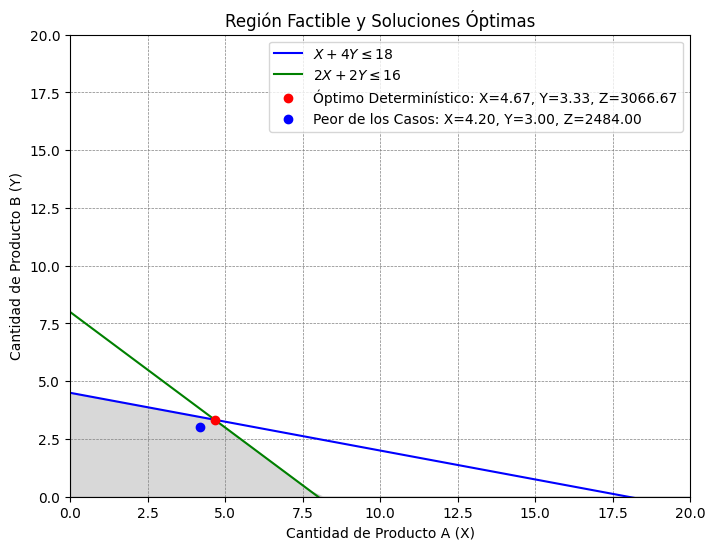

In [32]:
# Definir las restricciones para la gráfica
x_vals = np.linspace(0, 20)  # Ajustar el rango de valores para X
y1_vals = (18 - x_vals) / 4  # De la restricción X + 2Y <= 1000 (materia prima)
y2_vals = (16 - x_vals * 2) / 2 # De la restricción X + Y <= 700 (capacidad de producción)

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar las restricciones
plt.plot(x_vals, y1_vals, label=r'$X + 4Y \leq 18$', color='blue')  # Restricción de materia prima
plt.plot(x_vals, y2_vals, label=r'$2X + 2Y \leq 16$', color='green')  # Restricción de capacidad de producción

# Región factible sombreada
plt.fill_between(x_vals, np.maximum(0, np.minimum(y1_vals, y2_vals)), color='grey', alpha=0.3)

# Marcar el punto óptimo
plt.plot(opt_X, opt_Y, 'ro', label=f'Óptimo Determinístico: X={opt_X:.2f}, Y={opt_Y:.2f}, Z={opt_Z:.2f}')

# Marcar el nuevo punto óptimo (peor de los casos)
plt.plot(worst_X, worst_Y, 'bo', label=f'Peor de los Casos: X={worst_X:.2f}, Y={worst_Y:.2f}, Z={worst_Z:.2f}')

# Configuraciones del gráfico
plt.xlim((0, 20))  # Limitar el rango de valores de X para mostrar las restricciones
plt.ylim((0, 20))  # Limitar el rango de valores de Y para mostrar las restricciones
plt.xlabel('Cantidad de Producto A (X)')
plt.ylabel('Cantidad de Producto B (Y)')
plt.title('Región Factible y Soluciones Óptimas')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

Estado: Optimal

Óptimo Determinístico: X = 4.6666667, Y = 3.3333333, Z = 3066.6666600000003

Porcentaje de Variación de la Solución Robusta respecto al Óptimo Determinístico: 19.00%

Solución Robusta: X = 4.2, Y = 3.0, Z = 2484.0

Mario Ayavire Ayavire.


